# Build a CNN model

In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

from tools import pretraitement
import random
import os

In [2]:
# Chargement du jeu de données
(x_train_origin, y_train_origin), (x_test_origin, y_test_origin) = tf.keras.datasets.cifar10.load_data()
assert x_train_origin.shape == (50000, 32, 32, 3)
assert x_test_origin.shape == (10000, 32, 32, 3)
assert y_train_origin.shape == (50000, 1)
assert y_test_origin.shape == (10000, 1)

In [3]:
# pretraitement des données
(x_train, y_train) = pretraitement.normalize_dataset(x_train_origin, y_train_origin)

(x_test, y_test) = pretraitement.normalize_dataset(x_test_origin, y_test_origin)

In [4]:
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 10)
assert y_test.shape == (10000, 10)

In [9]:
# Construction d'un CNN

# La base CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2))) 

# Ajout de couches denses vers la fin du model
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [6]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

## Model training

In [10]:
# Compiling model

learning_rate = 0.001
loss='mean_squared_error'
#loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy']

model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss=loss,
              metrics=metrics)

In [ ]:
#fit
history = model.fit(x_train, y_train, epochs=10,#batch_size=150, 
                    validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 [==============================] - 28s 17ms/step - loss: 0.0776 - accuracy: 0.3333 - val_loss: 0.0647 - val_accuracy: 0.4863
Epoch 2/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.0654 - accuracy: 0.4819 - val_loss: 0.0593 - val_accuracy: 0.5348
Epoch 3/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.0601 - accuracy: 0.5335 - val_loss: 0.0544 - val_accuracy: 0.5830
Epoch 4/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.0569 - accuracy: 0.5635 - val_loss: 0.0528 - val_accuracy: 0.5963
Epoch 5/10
1563/1563 [==============================] - 27s 18ms/step - loss: 0.0541 - accuracy: 0.5876 - val_loss: 0.0502 - val_accuracy: 0.6195
Epoch 6/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.0520 - accuracy: 0.6096 - val_loss: 0.0496 - val_accuracy: 0.6289
Epoch 7/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.0503 - accuracy: 0.6246 - val_loss: 0.0483 -

In [9]:
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')

    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

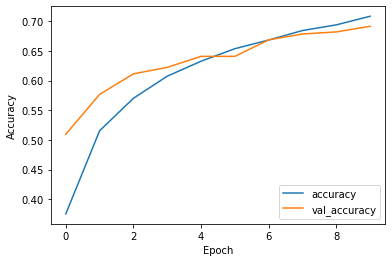

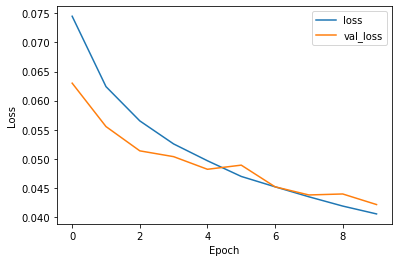

313/313 - 1s - loss: 0.0421 - accuracy: 0.6915 - 1s/epoch - 4ms/step
Test accuracy: 0.6915000081062317
Test loss: 0.042116645723581314


In [10]:
# Evaluation
plot_accuracy(history)
plt.show()
plot_loss(history)
plt.show()
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(f"Test accuracy: {test_acc}\nTest loss: {test_loss}")